In [10]:
from qiskit import *
from qiskit.visualization import *
from math import pi, sqrt, pow
from qiskit.circuit.library import MCMT
sim = Aer.get_backend('aer_simulator')

In [11]:
'''Creating diffuser circuit'''
def diffuser(nqubits):
    qc = QuantumCircuit(n)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    cnz = MCMT('z', num_ctrl_qubits = nqubits-1, num_target_qubits=1)
    qc=qc.compose(cnz)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.x(0)
    qc.z(0)
    qc.x(0)
    qc.z(0)

    for qubit in range(nqubits):
        qc.h(qubit)
        U_s = qc.to_gate()
        U_s.name = 'U$s$'
        return U_s


    
'''size of string'''
n=6
'''Creating Oracle'''
oracle = QuantumCircuit(n+1)
oracle.cx(1,n)
oracle.cx(0,n) #string is 110000
oracle_exn = oracle.to_gate()
oracle_exn.name = "U$_\omega$"

In [12]:
qc = QuantumCircuit(n+1,n)
qc.x(n)

for qubit in range(n+1):
    qc.h(qubit)

'''Number of iterations'''
itr = int(pi*sqrt(pow(pow(2,n),0.5))/4-0.5)
for i in range(itr):
    qc = qc.compose(oracle_exn)
    qc = qc.compose(diffuser(n))
for qubit in range(n):
    qc.h(qubit)
for i in range(n):
    qc.measure(i,i)
display(qc.draw())

┌───┐     ┌─────────────┐┌───────┐┌───┐┌─┐               
q_0: ┤ H ├─────┤0            ├┤0      ├┤ H ├┤M├───────────────
     ├───┤     │             ││       │├───┤└╥┘┌─┐            
q_1: ┤ H ├─────┤1            ├┤1      ├┤ H ├─╫─┤M├────────────
     ├───┤     │             ││       │├───┤ ║ └╥┘┌─┐         
q_2: ┤ H ├─────┤2            ├┤2      ├┤ H ├─╫──╫─┤M├─────────
     ├───┤     │             ││  U$s$ │├───┤ ║  ║ └╥┘┌─┐      
q_3: ┤ H ├─────┤3 U$_\omega$ ├┤3      ├┤ H ├─╫──╫──╫─┤M├──────
     ├───┤     │             ││       │├───┤ ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├─────┤4            ├┤4      ├┤ H ├─╫──╫──╫──╫─┤M├───
     ├───┤     │             ││       │├───┤ ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├─────┤5            ├┤5      ├┤ H ├─╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐│             │└───────┘└───┘ ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├┤ H ├┤6            ├───────────────╫──╫──╫──╫──╫──╫─
     └───┘└───┘└─────────────┘               ║  ║  ║  ║  ║  ║ 
c: 6/════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                             0  1  2  3  4  5

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_25192/4115166864.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = sim.run(qobj).result()


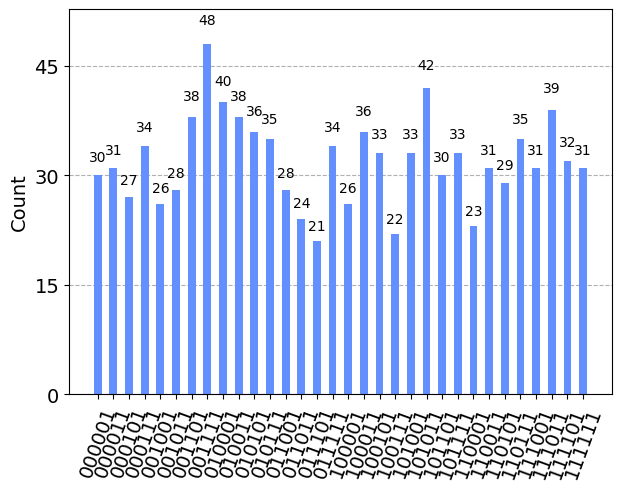

In [13]:
transpiled_grover_circuit = transpile(qc, sim)
qobj = assemble(transpiled_grover_circuit)
results = sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)